# Projeto 1 "Online Retail"

Dataset disponibilizado pela UC Irvine Macbine Leaning Repository em https://archive.ics.uci.edu/dataset/352/online+retail

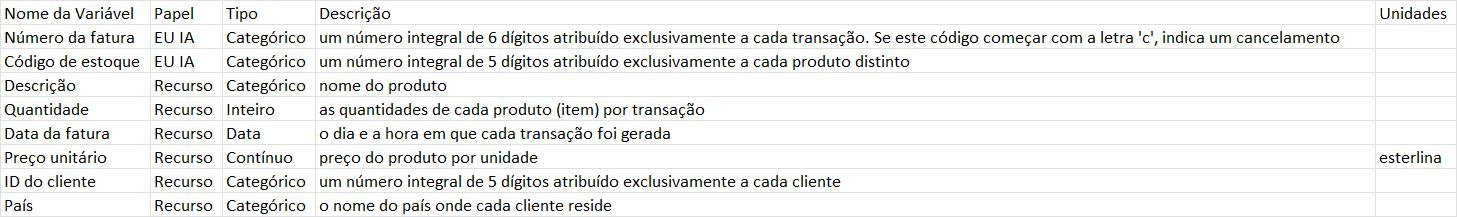

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#Importação de dados
#file_path = 'C:\\Users\\geral\\Desktop\\JUPITER\\Online+Retail.xlsx'

file_path = 'C:\\Users\\frank\\OneDrive\\Área de Trabalho\\Projeto-1\\Online+Retail.xlsx'

df = pd.read_excel(file_path)

In [3]:
#Vizualiação tipos de dados
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
#Criação do SalesTotal
df['SalesTotals'] = round(df['Quantity']*df['UnitPrice'],1)

In [5]:
df = df.copy()

df['Mounth'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df = df.drop(columns=['InvoiceDate'])

In [6]:

#df2['Month'] = df2['InvoiceDate'].dt.month
#df2['Year'] = df2['InvoiceDate'].dt.year

#df2 = df2.drop('InvoiceDate', axis = 1, inplace = True)

df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,SalesTotals,Mounth,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.3,12,2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.3,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.0,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.3,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.3,12,2010


In [7]:
#Vizualização data frame
df.tail()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,SalesTotals,Mounth,Year
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,10.2,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.6,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.6,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.6,12,2011
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France,14.8,12,2011


In [8]:
#Percentual de NA's
((len(df) / df.count())-1).round(3)

InvoiceNo      0.000
StockCode      0.000
Description    0.003
Quantity       0.000
UnitPrice      0.000
CustomerID     0.332
Country        0.000
SalesTotals    0.000
Mounth         0.000
Year           0.000
dtype: float64

In [9]:
#DataSet Filtrando 'c' Cancelados
df_cancelados = df[df['InvoiceNo'].str.startswith('C', na=False)]
print('Total de Cancelamentos: ',len(df_cancelados))

#DataSet Filtrado Cancelados
df = df[~df['InvoiceNo'].isin(df_cancelados['InvoiceNo'])]
print('Total de Vendas Sem cancelamentos: ',len(df))
print('Percentual de Cancelamento: ', round(len(df_cancelados)/len(df),2),'%')

Total de Cancelamentos:  9288
Total de Vendas Sem cancelamentos:  532621
Percentual de Cancelamento:  0.02 %


In [10]:
len(df['InvoiceNo'])

532621

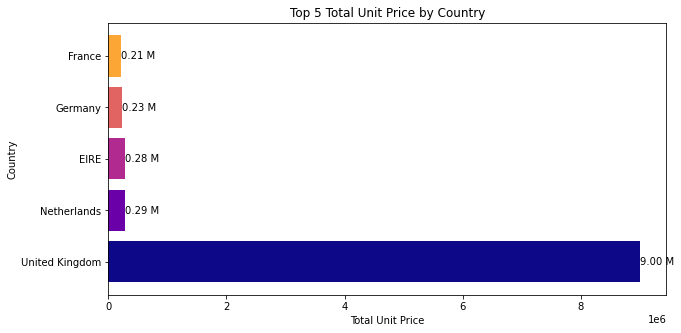

In [11]:
plt.figure(figsize=(10, 5))
for i, (country, value) in enumerate(df.groupby('Country')['SalesTotals'].sum().nlargest(5).items()):
    plt.barh(country, value, color=plt.cm.plasma(i / 5))
    plt.text(value, i, f'{value /1e6:.2f} M', va='center')  # Adicionar rótulo

# Config
plt.xlabel('Total Unit Price')
plt.ylabel('Country')
plt.title('Top 5 Total Unit Price by Country')


plt.show()


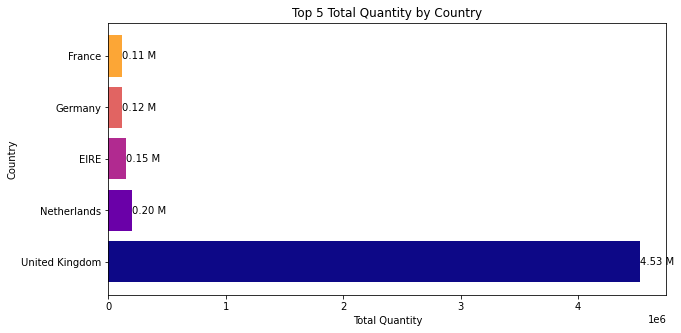

In [12]:
plt.figure(figsize=(10, 5))
for i, (country, value) in enumerate(df.groupby('Country')['Quantity'].sum().nlargest(5).items()):
    plt.barh(country, value, color=plt.cm.plasma(i / 5))
    plt.text(value, i, f'{value /1e6:.2f} M', va='center')  # Adicionar rótulo
    
# Config
plt.xlabel('Total Quantity')
plt.ylabel('Country')
plt.title('Top 5 Total Quantity by Country')


plt.show()

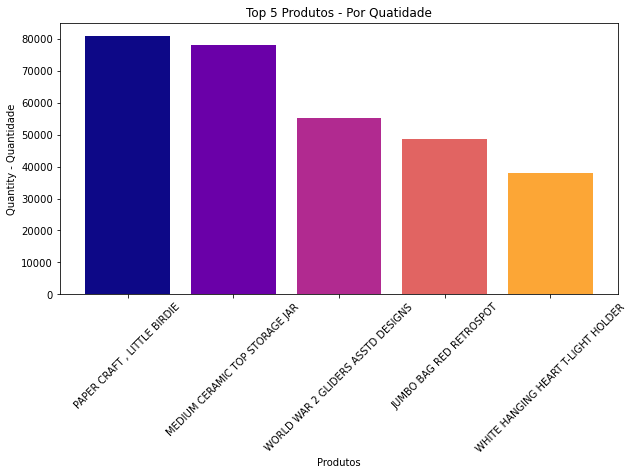

In [13]:
#Top 5 Produtos
plt.figure(figsize=(10, 5))
plt.bar(
    df.groupby('Description')['Quantity'].sum().nlargest(5).index,
    df.groupby('Description')['Quantity'].sum().nlargest(5).values,
    color=[plt.cm.plasma(i / 5) for i in range(5)],
    
   
)
# Config

plt.ylabel('Quantity - Quantidade')
plt.title('Top 5 Produtos - Por Quatidade')
plt.xlabel('Produtos')
plt.xticks(rotation=45)

plt.show()

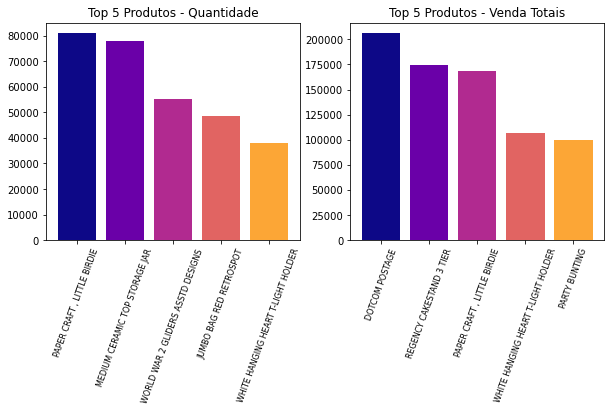

In [85]:
#Top 5 Produtos - Quantidades e Vendas

top_proucts_quantity = df.groupby('Description')['Quantity'].sum().nlargest(5)
label_quantity =  top_proucts_quantity.index
values_quantity = top_proucts_quantity.values

top_proucts_SalesTotals = df.groupby('Description')['SalesTotals'].sum().nlargest(5)
label_SalesTotals =  top_proucts_SalesTotals.index
values_SalesTotals = top_proucts_SalesTotals.values


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 4))

#### Grafico 1
ax1.bar(label_quantity, values_quantity, color=[plt.cm.plasma(i / 5) for i in range(5)])

# Define as localizações e rótulos dos ticks

ax1.set_title('Top 5 Produtos - Quantidade')
ax1.set_xticks(range(len(label_quantity)))
ax1.set_xticklabels(label_quantity, rotation=70, fontsize=8); 

#### Grafico 2

ax2.bar(label_SalesTotals, values_SalesTotals, color=[plt.cm.plasma(i / 5) for i in range(5)])

# Define as localizações e rótulos dos ticks

ax2.set_title('Top 5 Produtos - Venda Totais')
ax2.set_xticks(range(len(label_SalesTotals))) 
ax2.set_xticklabels(label_SalesTotals, rotation=70,fontsize=8);

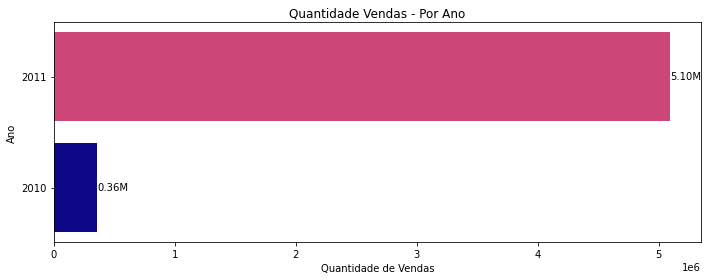

In [96]:
import matplotlib.pyplot as plt

# Agrupar e somar as quantidades por ano
quantity_year = df.groupby('Year')['Quantity'].sum()

# Obter os rótulos e valores
label_quantity_year = quantity_year.index.tolist()  # Converte o índice para uma lista
values_quantity_year = quantity_year.values

# Criar a figura e o eixo
fig, ax3 = plt.subplots(1, 1, figsize=(10, 4))

# Gráfico de barras horizontais
bars = ax3.barh(label_quantity_year, values_quantity_year, color=[plt.cm.plasma(i / 2) for i in range(len(label_quantity_year))])

# Adicionar rótulos de valores nas barras
for bar in bars:
    xval = bar.get_width()  # Comprimento da barra (quantidade)
    label = xval / 1_000_000
    ax3.text(xval, bar.get_y() + bar.get_height()/2, f'{label:.2f}M', va='center')  # Adiciona duas casas decimais

# Definir título e rótulos dos eixos
ax3.set_title('Quantidade Vendas - Por Ano')
ax3.set_xlabel('Quantidade de Vendas')
ax3.set_ylabel('Ano')

# Definir os ticks do eixo Y para mostrar apenas os anos desejados
ax3.set_yticks([2010, 2011])  # Apenas 2010 e 2011
ax3.set_yticklabels([str(year) for year in label_quantity_year], fontsize=10)  # Rotular os anos

plt.tight_layout()
plt.show()


In [44]:
print(quantity_year)

Year
2010     358270
2011    5095754
Name: Quantity, dtype: int64


In [94]:
for bar in bars:
    xval = bar.get_width()
    print(f"Valor de xval: {xval}")  # Isso imprimirá o valor de cada barra
    ax3.text(xval, bar.get_y() + bar.get_height()/2, int(xval), va='center')

Valor de xval: 358270
Valor de xval: 5095754
